<b>DOWNLOAD THE DATA</b> - pg(43) 
<br>
    <p>In a typical project ther would be many loopholes and administration <br>
    things to go through but in this project just get the compressed housing.tgz <br>
    file and extract the housing.csv from it.</p>
    <p>Creating a small function to retrieve and extract the data will help to later <br>
    automate the process and even set up scheduled times. This would also help to work <br>
    on all machines instead of just this one.</p>
    <p>The function will serve to retrieve the file from the url, check to see if it <br>
    has a certain directory to store it in, if not it will create it and then it will <br>
    extract the .csv from the .tgz and place it in the directory.</p>


In [152]:
import os  # work with os stuff
import tarfile  # used to work with tar files
from six.moves import urllib  # gets urls

import time  # with with time and sleep

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"  # the place to get the datasets from
housing_path = os.path.join("datasets", "housing")  # the directory this dataset will be saved in
housing_url = download_root + "datasets/housing/housing.tgz"  # the full url of the dataset getting

# two default values of the url and the directory of storage
def fetch_housing_data(url=housing_url, path_=housing_path):
    # ".isdir(<path>)" checks if it has the directory given, this checks where it is, if in
    # if it doesn't ".makedirs(<path>)" will make the directory with the diven path where it is
    if not os.path.isdir(path_):
        os.makedirs(path_)
    tgz_path = os.path.join(path_, "housing.tgz")  # make a open file for what .tgz file will go
    urllib.request.urlretrieve(url, tgz_path)  # get the data from url and put it in the open file
    housing_tgz = tarfile.open(tgz_path)  # take the now full data file and open it as a tarfile, need to work with it
    housing_tgz.extractall(path=path_)  # extract the file contained in it, this is the .csv file which will automatically be added to directory given
    housing_tgz.close()  # close the file because not working with it now
    # try to remove file after use
    # work on this more
    """
    try:
        # works now for some reason
        os.remove(housing_tgz.name)
        print(str(housing_tgz.name) + " removed.")
    except PermissionError as e:
        print(e)
        """

In [153]:
fetch_housing_data()

<p>The next function will serve to convert the .csv file gotten above to a pandas dataframe.</p>

In [154]:
import pandas as pd  # import pandas

# function to just convert the csv to a dataframe
# has a default value path_ of the housing_path
def convert_to_df(path_=housing_path):
    path = os.path.join(path_, "housing.csv")  # get the path of csv file
    return pd.read_csv(path)  # return the dataframe

<b>TAKE A QUICK LOOK AT THE DATA STRUCTURE</b> - pg(45)<br> 
    <p>Using the <i>.head()</i>, <i>.tail()</i>, and <i>iloc / loc</i> it can be seen the <br>
    beginning middle and end of the df.</p>

In [155]:
df = convert_to_df()
df.head()  # beginning

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [156]:
df.loc[10000:10005, : ]  # middle

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10000,-121.08,39.02,13.0,1839.0,275.0,752.0,270.0,4.2031,209600.0,INLAND
10001,-121.07,39.05,10.0,1813.0,311.0,827.0,287.0,3.6087,182100.0,INLAND
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
10003,-121.03,39.05,12.0,1875.0,307.0,806.0,283.0,3.9185,195200.0,INLAND
10004,-121.06,39.04,14.0,1651.0,279.0,633.0,261.0,4.2802,194800.0,INLAND
10005,-121.06,39.04,15.0,1999.0,287.0,585.0,246.0,5.5161,361900.0,INLAND


In [157]:
df.tail()  # end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [158]:
df.info()  # gets information on rows, columns, types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p>total_bedrooms are 20,433 meaning some of the districts (207) are missing them. <br>
This will need to be a problem taken care of later because a NAN value won't work here.</p>
<p>Almost all attributes/colums are float/numerical except ocean_proximity which is object.<br>
Knowing this a csv it is likely text and looking through df it shows to be a catagorial mark.</p>

In [159]:
df["ocean_proximity"].value_counts()  # couts all values of ocean_proximity and returns a series of categories and counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [160]:
df.describe()  # returns a dataframe describing the statistics on numerical columns/attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>Another good way to get a feel for data working with is to plot a histogram.<br>
<i>A histogram shows the number of instances (vertical axis) that have a given value range (horizontal axis).</i></p>

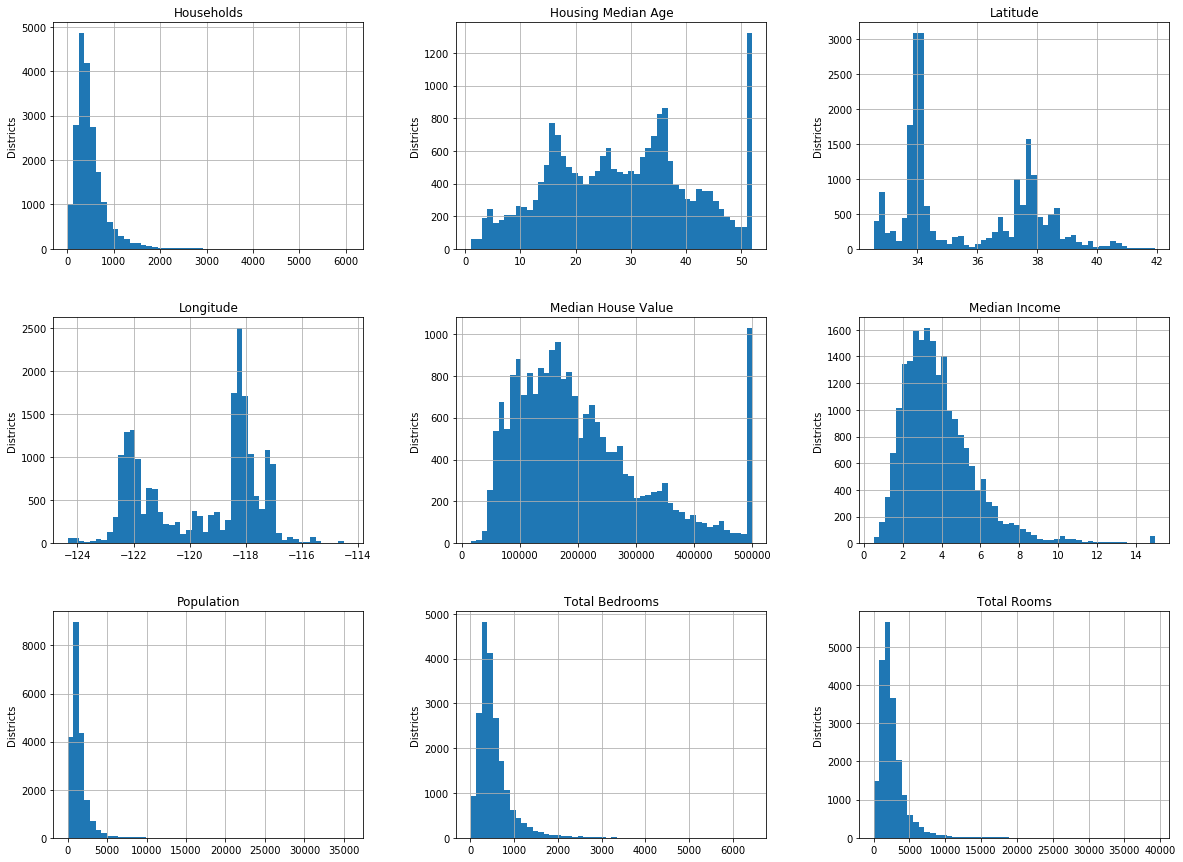

In [161]:
%matplotlib inline  
# this is used to show graphs in jupyter lab
# matplotlib requires somewhere to tell it how and where to render
# jupyter does this automatically but other places need to be told, mayber like the command below
import matplotlib.pyplot as plt  # import plotting stuff

for i in df.hist(bins=50, figsize=(20, 15)):  # use the .hist() function to create histograms of each series of districts and its attributes, then loop through
    for e in i:  
        # making it look pretty
        e.set_ylabel("Districts")
        word_list = e.get_title().split("_")
        word_list = [word.capitalize() for word in word_list]  # use list comprehension instead of enumerate indexing
        word = " ".join(word_list)
        e.set_title(word)
        
plt.show()

<h4>Analyzing the Data and Graphs</h4>

<p>1.</p>
<p>
On the landscape of the districts it looks like there are larger communities <br>
all houses build off of, this is possible in the longitude and latitude. The median income, <br>
total rooms, total bedrooms, population, and households follw a somewhat bell curve shape. <br>
</p>
<p>2.</p>
<p>
The median income is capped at 15.0 and .5 to accomodate rich and poor outliers. <br>
These numbers are in terms of 10,000 dollars = 1 unit.<br>
<i>Pre-processed numbers are common in ML, it isn't a problem but it is something to understand.</i>
</p>
<p>3.</p>
<p>
The median house age and values were both capped as well showing the sudden spike a the right sides. <br>
This could be a series issue if predictions need to made of places above those caps (500,000 and 52). <br>
There are two main options: <br>
&emsp;a. Get the data for those places. <br>
&emsp;b. Remove the districts from the traing set and test set. The system should be ok with instances <br>
&emsp;&emsp;over 500,000 because the algorithm will be trained well enough to scale ok.
</p>
<p>4.</p>
<p>
These attributes will have different scales. <br>
<i>This will be discussed later in the chapter when exploring scaling.</i>
</p>
<p>5.</p>
<p>
Histograms are <u>tail heavy</u>. They extend much farther to right of median than to the left. <br>
This makes it much marder for ML algorithms to detect decent patterns, (somewhat graph bias). <br>
<i>Will be trying to transform these attributes later on in the chapter to have more of a bell-shape distributions.</i>
</p>

<b>CREATE A TEST SET</b> - pg(48)
<p>It may be weird to set aside test data right now before moving on but if you look <br>
into the data too much, the human brain tends to pick up easily on patterns and may <br>
select specific data. Some bias could be there is a pattern of outliers so you <br>
could select only a few to keep the algorithm working as you want but this would <br>
over-estimate the gereralization and then make it too optimistic when in reality <br>
the system isn't so. This is called <i>snooping bias</i>.</p>

<p>Theoretically creating a test set is simple, just randomly pick 20% of the test set.<br>
This function will take 20% random districts from df and return the testing.</p>

In [162]:
import numpy as np  # get numpy for its work on series/df of data

# take the dataframe and ratio of all data frame to use
def split_train_test (data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # create a randomly indexed series the same length as the input df
    test_set_size = int(len(data) * test_ratio)  # get how any instances will be used, a percentage of full df
    """this gets 20% test, 80% train"""
    test_indices = shuffled_indices[:test_set_size]  # allocate from the beginning to the test_set_size as the test size, this is in the randomized df
    train_indices = shuffled_indices[test_set_size:]  # allocate from the test_set_size to the end as the training size, this is in the randomized df
    """
    then return two df, both using iloc to return a df of only the instances in eah set
    iloc allows to make a df of all instances of an array using the the row indexes
    iloc[<numpy-array>] - allows to choose specific instances as specificed by the object, it could as for just two elements
    iloc still keeps its functionality with dataframes
    """
    return data.iloc[train_indices], data.iloc[test_indices]

In [163]:
training_set, testing_set = split_train_test(df, .20)

In [164]:
print(f"{len(training_set)} + {len(testing_set)} = {len(testing_set) + len(training_set)} ... full set")  # showing the length add up to the df total

16512 + 4128 = 20640 ... full set


In [165]:
training_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13207,-117.71,34.05,20.0,2281.0,444.0,1545.0,481.0,2.5735,130500.0,INLAND
4296,-118.28,34.09,38.0,790.0,275.0,664.0,194.0,3.0357,175000.0,<1H OCEAN
17065,-122.22,37.48,47.0,2570.0,783.0,3107.0,724.0,2.8058,229500.0,NEAR OCEAN
8215,-118.19,33.79,37.0,1834.0,551.0,1967.0,476.0,2.1370,126600.0,NEAR OCEAN
14875,-117.08,32.63,33.0,2891.0,793.0,1607.0,754.0,2.1281,139800.0,NEAR OCEAN


In [166]:
testing_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15039,-117.00,32.77,35.0,2114.0,317.0,881.0,320.0,5.5000,241400.0,<1H OCEAN
14465,-117.23,32.81,22.0,3205.0,429.0,1083.0,410.0,8.1844,406300.0,NEAR OCEAN
17812,-121.86,37.39,17.0,1777.0,328.0,1235.0,329.0,5.4225,258100.0,<1H OCEAN
11275,-117.97,33.78,35.0,3148.0,597.0,2110.0,587.0,3.9479,203800.0,<1H OCEAN
12066,-117.56,33.83,28.0,895.0,127.0,346.0,115.0,5.4788,339300.0,INLAND


<p>Though there is an issue with the above solution to setting the sets.<br>
Everytime the program is re-run the test and train sets will change.</p>
<p>There are a few ways to potentially solve this: <br>
&emsp;- run the program and then save the randomized dataframes, like pickles<br>
&emsp;- set the random number generator's seed (ex: np.random.seed(42))<br>
Though these solutions will eventually break the next time the dataset updates.<br>
A good soliution is to use each instances immutable identifier. This could be using <br>
the hash of each identifier to put anything less than or equal to the max hash <br>
in the test and the rest to go into the training.
</p>
<p>This route is the strongest because even if the dataset is refreshed and there <br>
is more, the indenifiers will stay the same and it will still have the original <br>
sets and the new sets integrated with their original ratios without the training and <br>
testing sets getting messed up.</p>
<b><u>Research More into CRC-32</u></b> <br>
<u><i>Below is testing with the hash stuff...</i></u>

In [167]:
from zlib import crc32

# this works with hash and the maximun hash value for any other is 2^32
# the gets a series of the id of each instance and then uses crc32 to return the bit value of each instance, these will never change
print(f"first {crc32(np.int64(df.iloc[0:1, df.index[0]:df.index[1]]))}, second {crc32(np.int64(df.iloc[1:2, df.index[1]:df.index[2]]))}")

first 2455459239, second 3568612187


In [168]:
count = 0

df_index = df.reset_index().copy()

for i in df_index['index']:
    t = crc32(np.int64(i))  # crc32 creates a unique 32bit identifier from a certian indentifier in the dataframe, this being the index indentifier
    if ((2 ** 32 * .2) > t):
        count += 1
        
print(count)
        

4128


In [169]:
df_index.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Continuation of chapter...

In [170]:
from zlib import crc32  # import stuff for crc32

# take an identifier object and the ratio in the test set
def test_set_check(identifier, test_ratio):
    #  use the indentifer to get the hash - then do something im not sure of - and then compare it to the ratio of max hash
    # numpy array of trues and falses
    return crc32(np.int64(identifier)) & 0xffffffff <= test_ratio * 2**32

# take the df, the ratio in test, and the name of the columns with the ids
def split_train_test(data, test_ratio, id_column):
    ids = data[id_column]  # get a series of the ids
    # use pandas .apply() to call a lambda function for all the the instances and either determine if it is or isnt in test
    # the lambda function creates a series of trues and falses to things that return from condition
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))  # lambda function calls test_set_check and uses the row its on and the ratio
    """
    returns a df based on the whether it is test or not
    uses loc to take a numpy array and use what ids it states for the datasets respectively
    loc in this case takes the trues only in a series and when "~" is placed in front it works opposite, for falses
    loc takes boolean arrays/series
    """
    # print(type(in_test_set))
    return data.loc[~in_test_set], data.loc[in_test_set]  

Since the id is not a column it would be wise to use the row index.

In [171]:
df_with_id = df.reset_index().copy()
training_set, testing_set = split_train_test(df_with_id, .2, "index")

In [172]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 2 to 20629
Data columns (total 11 columns):
index                 4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4085 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 387.0+ KB


<p>A specific id isn't necessary. An identifier can be formed out of a logical identification. <br>
For example, the location of the places is likely to not change much so a combination of the <br>
longitude and latitude would work fine.</p>
<p>EX:</p>

In [173]:
# don't know why this one is off
df_with_id['id'] = df['longitude'] * 1000 * df['latitude'] 
training_set, testing_set = split_train_test(df_with_id, .2, "id")

In [174]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 2 to 20639
Data columns (total 12 columns):
index                 4248 non-null int64
longitude             4248 non-null float64
latitude              4248 non-null float64
housing_median_age    4248 non-null float64
total_rooms           4248 non-null float64
total_bedrooms        4208 non-null float64
population            4248 non-null float64
households            4248 non-null float64
median_income         4248 non-null float64
median_house_value    4248 non-null float64
ocean_proximity       4248 non-null object
id                    4248 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 431.4+ KB


<p>Scikit-Learn also provides a few functions to split databases. Like shown above, is <br>
the function train_test_split which does the same thing but with more features. Some <br>
of the features are a <i>random state</i> parameter that allows to set the random <br>
generator as stated earlier. Can also pass multiple datasets with identical number of rows <br>
and will split them on the same indices, same df refering to one thing but with different kinds <br>
of data (good for df with labels).</p>


In [175]:
from sklearn.model_selection import train_test_split

df_test = df.copy()
training_set, testing_set = train_test_split(df_test, test_size=.2, random_state=42)

In [176]:
testing_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


In [177]:
training_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>Random sampling patterns aren't a fear for large datasets most the time, but if  <br>
smaller or more vulnerable there is a chance on running the risk of introducing bias.<br>
For example, say you are running a survey of 1,000 people in the US, to ensure that the <br>
1,000 people are representative of the whole population it would have to be taken into <br>
account that 51% are male and 49% are female. This is called <i>stratified sampling</i> and <br>
the population is divided into groups called <i>strata</i> and the right number of instances are <br>
sampled from <i>stratum</i> to guarantee it is representative of whole population.</p>

<p>Now in this projects case, the medium income is an important factor and it is <br>
necessary to keep it representative in both the testing and training cases.</p> 
<p>Since this attribute is a continuos numerical, it would need to have a category attribute.<br>
Looking at the graph of the median income, most values are clustered around 2 and 5. Though <br>
some values go far beyond 6. (It is also important to have a sufficent number of instances for <br>
each stratum or else the estimate may be biased). <u>This means there shouldn't be too many strata <br>
and each stratum should be large enough</u>.</p>

<p>In this case, creating an income category attribute where it is each median income <br>
divided by 1.5 then rounded up and keeping only those 5 or below and merging all above to 5.</p>

In [178]:
df_cat = df.copy()  # copy for testing purposes 

df_cat['cat'] = np.ceil(df_cat['median_income'] / 1.5)  # go through each instance and make their 'cat' attribute their median income divided by 1.5
# .where() checks the df for the input condition and sets anthing that doesn't satisfy the conditon with the second(other) parameter
# inplace also means it makes changes in the dataframe itself
df_cat['cat'].where(df_cat['cat'] < 5, 5.0, inplace=True)

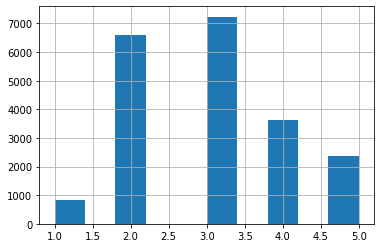

In [179]:
df_cat['cat'].hist()  # represent the data graphicaly

In [180]:
df_cat['cat'].describe()  # statistically

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: cat, dtype: float64

With right amount of stratas and the stratums set right, the cat column can be used to split <br>
the testing and training data. <i>Stratified sampling</i> on the income category.

In [181]:
from sklearn.model_selection import StratifiedShuffleSplit  # stratified shuffle split to shuffle based on the stratified data

# create a stratified split object that will take in the number of strats splitting by, the test size, and the randmom state seed
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(split)

# the .split() method takes the df splitting and the strat column to represent
# this uses a generator to spit out a tuple of an array of test and train
for train_index, test_index in split.split(df_cat, df_cat['cat']):
    print(train_index)
    print(test_index)
    # then use loc or iloc to take in an array and use only those instances
    strat_train_set = df_cat.loc[train_index]
    strat_test_set = df_cat.loc[test_index]

# the split method creates a gener
print(split.split(df_cat, df_cat['cat']))

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]
<generator object BaseShuffleSplit.split at 0x0000017770040E48>


In [182]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [183]:
strat_test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cat
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647,3.007267
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854,1.054808
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000,1.000000
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000,2.000000
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000,3.000000
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000,4.000000
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000,5.000000


Notice their median income averages are really close.<br>
Now comparing the value counts in the testing set and the full df...

In [184]:
df_cat['cat'].value_counts() / len(df_cat)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: cat, dtype: float64

In [185]:
strat_test_set['cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: cat, dtype: float64

<p>The test subset represents the original df's closely.</p>
<p>Finally the 'cat' attribute should be removed from the sets because it is unnecessary.</p>

In [186]:
# set_ is a combined df of the training and testing set
for set_ in (strat_train_set, strat_test_set):
    print(set_)
    # drop removes a certain column or row
    # axis is 0 for rows and 1 for axis
    # inplace is in the sets themself
    # drop then removes the 'cat' access in the combined sets which are in place
    set_.drop('cat', axis=1, inplace=True)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

In [187]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


<p>The 'cat' attribute has been removed from the dataframes.</p>
<p>A lot of time has been spent on the testing and training sets, while it may seem <br>
like a lot it is often a neglected important part of any ML project</p>
<p>More ideas about like things will be discussed in cross validation.</p>

<b>DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS</b> - pg(53)
<p>The goal now is to delve a little more deeper into the data. Its time to put the test set aside <br>
and work with the training set to look for patterns and such. <i>Also if working with a large <br>
training set it is an option to make another set off of it for exploration</i>.</p>
<p>In this case it is quite small so we can just work with a copy.</p>

In [188]:
df = strat_train_set.copy()

<b>VISUALIZING GEOLOGICAL DATA</b> - pg(54)
<p>Since there are longitudes and latitudes it won't hurt to visualize geological data. To do this a <br>
scatterplot would be useful.</p>

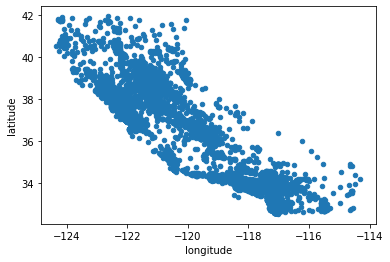

In [189]:
# .plot() on a pd df makes a plot of the df, it has optional default values of 
# kind='' which selects the type of graph, 
# x='' which decides what will be the x axis,  
# y='' which decides what will be the y axis
df.plot(kind='scatter', x='longitude', y='latitude')

<p>Looks like Cali. It is hard to see any real pattern in the visual. Setting alpha to 0.1 will make <br>
it much easier to see density of data points. <i>I think alpha works with opacity</i>.</p>


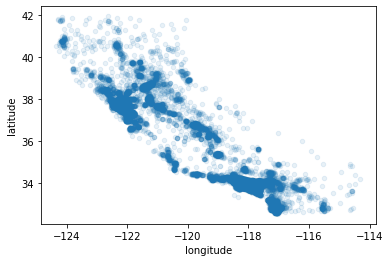

In [190]:
# aplha is another default optional value, it works with the opacity of data points
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<p>With alpha set it is much easier to see high-density areas, which look like the Bay, San-Diego, and Los <br>
Angeles (<i>As thought before</i>). Playing with the paramerters will make patterns stand out more.</p>
<p>Making the radius of each circle to represent a district's population and making the color represent the price.<br>
This uses (<i>option s as the population sized circles</i>) and (<i>option c as the colored price</i>). Working with the colar will <br>
use the pre-definded (<i>color map called "jet" option cmap that ranges from blue low values to red high values</i>).</p>

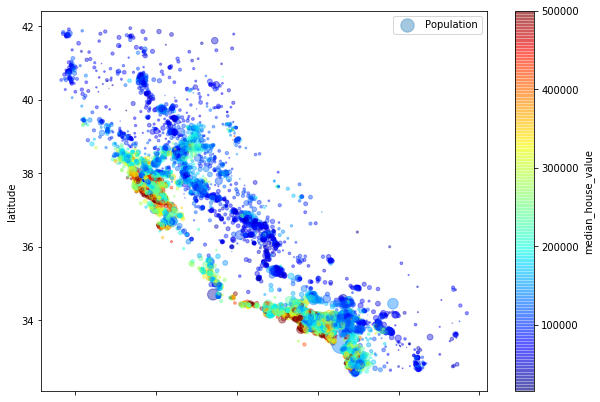

In [191]:
# darken the alpha because colors will get lighter, 
""" 
"s" is the s axis which is size of data points, use population column from df divided by 100 do keep the circles small, They are large and need to fit on graph 
needs to change the size of each value from population so need to call df[<attribute>] to perform action for each value in graph
"""
# "label" sets the label for what each data point represents
# "figsize" sets the size of the graph
"""" 
"c" is the axis that controls color of data points, default of black and white color, it doesn't need the column specifically like for the s axis, \
the function is being called on df so it knows attributes
"""
# "cmap" is the deafault color bar, "plt" comes with premade color bars like jet, use plt".get_cmap()" to call a color bar
# "colorbar" sets the color bar to be displayed

df.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=df['population']/100, 
        label='Population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), 
        colorbar=True)
plt.legend()  # think this is supposed to make legends appear but it happens automatically in lab

<p>The graph shows that there is a relation between location and housing prices and population density. It will <br>
likely be useful to create a clustering algorithm to detect main clusters and measure proximity to the cluseters. <br>
The ocean proximity attribute could prove useful but because Northern Cali doesn't follow these rules it is not a simple rule.</p>

<b>LOOKING FOR CORRELATIONS</b> - pg(56) 
<p>Because the dataset isn't too large, 20,000 is baby, the <i>standard correlation coefficient (also called Pearson's r)</i> <br>
can be easily computed between every pair of attributes using the corr() fucntion. This function compares every attribute to <br>
every attribute and sees if there are correlations in increases and decreases</p>

In [192]:
df_corr = df.copy()  # could be drop the other non useful attributes 
df_corr.drop('ocean_proximity', axis=1, inplace=True)  # drops on the second axis (0-1) y

In [193]:
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0


In [194]:
df_corr = df
corr_matrix = df.corr()  # .corr() creates a df matrice that has a corelation coefficent between the attributes of that x and y point
corr_matrix['median_house_value'].sort_values(ascending=False)  # sort_values makes it go in order to show greatest correlations first and last, ascending means biggest to smallest

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [195]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<p>The correlation coefficent ranges from -1 to 1. When close to 1 it means there is a correlating increase and when close to <br>
-1 there is a correlation decrease. As seen, the median house value tends to go up with the median income and slightly down wih <br>
the increase in latitude. Correlations close to 0 are little to no relations.</p>
<p><i>Figure 2-14 on pg 57 shows correlation coefficent models of various linear datasets.</i></p>
<p>Correlation coefficient only measing the linear correlations like if x does down the y goes up. This means it may completly <br>
miss nonlinear correlations like if x is close to 0 then y generally goes up. <i>On the bottom rown of 2-14, all the plots have <br>
a correlation coefficient of zero even though their movement and axis are not independent</i>. </p>
<p>Another way to check correlation between attributes is to use Pandas <i>scatter_matrix</i> fucntion. This plots every numerical <br>
attribute against every other numerical attribute. Because there are 11 attributes, that means that there will be 11^2 plots which <br>
is just too much so its ok for now to just focus on a few interesting ones with median housing value.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017750E7D988>,
      dtype=object)

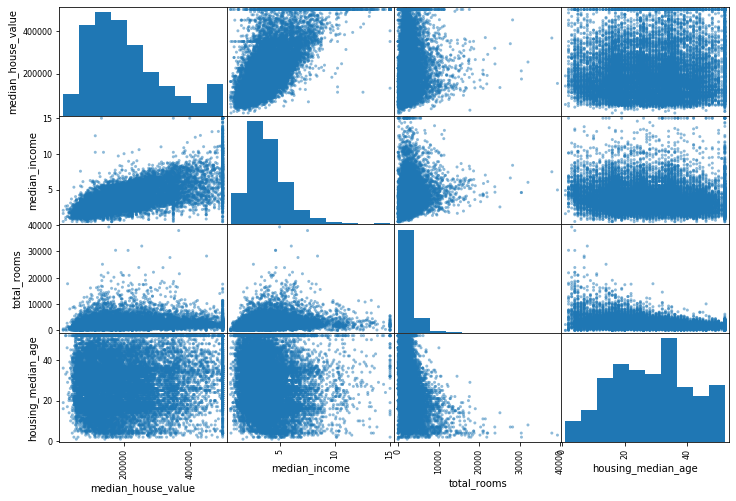

In [196]:
from pandas.plotting import scatter_matrix  # import scatter matrix function from pandas

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']  # make a list of columns to use
# call scatter_matrix() function, this will create an array of matplotlib gprahs in groups of each attribute
# pass the required argument of the df (can dive certian attributes calling columns)
# also use the figsize default argument to set each graphs size
scatter_matrix(df[attributes], figsize=(12, 8))  

<p>The main diagonal from top left to bottom right would just we straight lines but thats not useful so pandas displays histograms, <br>
this can be changed just look in documentation. The best looking graph is the median_hous_value and median_income so it would be <br>
best to make a scatter plot of its self to see it in better detail, like zooming in on it.</p>

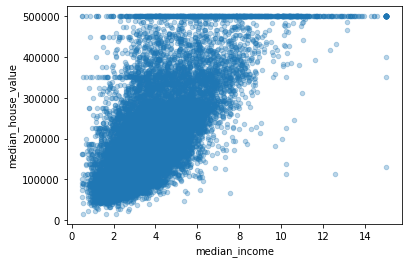

In [197]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.3)  # kind chosing scatter plot, setting x and y, and changing opacity of each point

<p>The plot reveals some major factors. Firstly, there is a strong correlation between the two. Secondly, is that the <br>
cap at 500,000 is extremly noticable (and an issue) with the top row. Along with this there are also lines at 450,000 and <br>
350,000 (and even some others) so they may want to be fixed up before feeding data to algorithm so it doesn't replicate <br>
those effects. <i>Could remove the districts to prevent from reproducing data quirks</i>.</p>

<b>EXPERIMENTING WITH ATTRIBUTE COMBINATIONS</b> - pg(59)
<p>The previous sections have given a good idea of ways to explore the data to gain insights. <i>Some data quirks were identified <br>
that should be cleaned up before feeding to system. Some interesting attribute correlations have been found (mainly with target median <br>
house value)</i>. Some attributes have a <i>tail-heavy</i> distrubution which could be clean with a logarithm transformation. While <br>
this project is exact, the ideas are general.</p>
<p>One last thing to do before preparing data for ML algorithm is to find any sort of unique attribute combinations that have correlations.</p>
<p>It is known that the total number of rooms by itself isn't very usual but maybe a combination like rooms per per houshold will have an <br>
effect. Or, the number of bedrooms was similary not useful but maybe bedroom per total rooms. Finally, the population per household could <br>
be an intersting combination to look at.</p>

In [198]:
df['rooms_per_household'] = df['total_rooms'] / df['households']  # divides all total_rooms by households and makes that attribute equal result
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']  # divides all total_bedrooms by total_rooms and makes that attribute equal result
df['population_per_household'] = df['population'] / df['households']  # divides all population by households and makes that attribute equal result

In [199]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

<p>Seen from the correlation matrix, bedrooms per rooms has a significant negative correlation with rooms per household <br>
being around the same as total rooms.</p>
<p>This experimentation is helpful in getting insight and working on getting a better model for algorithm. This is an <br>
iterative process so once the ML is processed you NEED to go back and see if it can get an even better model to learn from.</p>

<b>PREPARE DATA FOR MACHINE LEARNING ALGORITHMS</b> - pg(60)
<p>To prepare data for Machine Learning algorithms instead of doing it manually it is always best to write functions to do so.</p>
<p>This is for several reasons: <br>
&emsp; - Allow for reproducing these transformations easily on any dataset (next fresher dataset). <br>
&emsp; - It will help gradually build a library of preparation functions for any projects. <br>
&emsp; - Use functions in live system to transform new data before feeding it to algoritms. <br>
&emsp; - Make it possible to try out various transformations and find whats best. <br>
</p>
<p>Firstly, revert to a fresh training df. <br>
&emsp; - <i>Make one have all attibutes to be the training features</i>. <br>
&emsp; - <i>and have another of just the lable attributes, this is the median house value (thing trying to predict)</i>.</p>

In [200]:
df_feat = strat_train_set.drop('median_house_value', inplace=False, axis=1)  # remove the labels and set it equal as a new df

In [201]:
strat_train_set  # original stays in-tack

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [202]:
df_feat  # new df with no labels just features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [203]:
df_lbls = strat_train_set['median_house_value'].copy()  # just take a series of the labels, make a copy so it doesn't alter the original

In [204]:
strat_train_set  # original stays in-tack

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [205]:
df_lbls  # new df with just labels no features

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

<b>DATA CLEANING</b> - pg(61)
<p>Machine Learning algorithms won't work with missing features, <i>like not all bedrooms in dataframe</i>. <br> 
In this case total_bedrooms has three options to fix its missing values:<br>
&emsp; - Remove the rows/districts with the missing attribute.<br>
&emsp; - Remove the entier total_bedrooms attribute.<br>
&emsp; - Set the missing values to some value like (<i>zero, mean, median, etc</i>).
</p>

In [206]:
# dropna takes attribute sets to look for and if they have a missing value to drop the rows
df_feat.dropna(subset=['total_bedrooms'])  # shows option #1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [207]:
# drop deletes the attribute input and axis determines x or y
df_feat.drop('total_bedrooms', inplace=False, axis=1)  # option #2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,<1H OCEAN


In [208]:
median = df_feat['total_bedrooms'].median()  # get the median value of total bedrooms with .median(), goes through all the values and gets the median, ignores the missing values and just gets numerical
#  call fillna on a specific series or df and chose what to replace the NAs with as input
df_feat['total_bedrooms'].fillna(median, inplace=True)  # shows option #3

In [209]:
df_feat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


<p>If using option three, the median value should be computed/saved and on both the train AND test set with the same one <br>
from training. This will make it easier to replace values on testing and once system goes live.</p>
<p>Scikit-Learn also provides a good class to take care of missing values called <b>SimpleImputer</b>.</p>
<p>To use it first create a <i>SimpleImputer</i> instance specifying the strategy to replace all missing values with, this is median, mean, etc...</p>

In [210]:
from sklearn.impute import SimpleImputer  # import SimpleImputer

imputer = SimpleImputer(strategy='median')  # creates an instance of SimpleImputer class working with the median strategy

In [211]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Since the median can only be computed on numerical attributes, ocean proximity must be removed for a temporary df to work with.

In [212]:
df_feat_nums = df_feat.drop('ocean_proximity', axis=1)  # drop ocean proximity and set the df to df_feat_nums

Now the imputer instance must be be fit to the df using. <i>This uses the .fit() method on the imputer instance</i>.

In [213]:
# don't really know what .fit() does (LOOK MORE INTO IT) but call fit on imputer instance and pass the df in to fit it onto...
# it goes through all the attributes and carries out its strategy on them, then saves their outputing strategies inside its variables/methods
imputer.fit(df_feat_nums)  # fit the imputer on df_feat_nums

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

<p>The <i>imputer</i> instance just went through and got the median for all the attributes and stored an array of each attributes <br>
medians in its <i>statistics_</i> variable. In this case only bedrooms had missing attributes but we can't be certain there<br>
aren't others missing in general so it is best to compute all. <i>Also won't be certain that after system goes live others will <br>
have everything the same</i>.</p>

In [214]:
imputer.statistics_  # the statistics variable on the imputer instance stores array of attribute medians

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [215]:
# the .median() returns a series of attributes and their values, the .values is an array of just the values
df_feat_nums.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

With the 'trained' imputer, now the df has to apply the imputer to itself changing all NA values to the corresponding medians. This is <i>transforming</i>.

In [216]:
# the imputer instance has a method .transform() that takes the df to transform as an argument
# it then goes through and makes an array for each instance on df
# all NAs are filled with median in statistics_ variable
# then an array of all the arrays is returned
x = imputer.transform(df_feat_nums)

In [217]:
x  # this is a multidimensional array

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

A regular numpy array is returned and it can simply be used to create a df.

In [218]:
# create a direct DataFrame by calling a DataFrame object on pd
# then pass in numpy array to be instances in length and attributes in width
# use the optional argument columns= to set the column names
df_feat_nums_tr = pd.DataFrame(x, columns=df_feat_nums.columns)

In [219]:
df_feat_nums_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [220]:
df_feat_nums_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


Notice that all attributes (including total_bedrooms) have 16,512 numerical instances meaning none have missing values. <br>
<i>There is also a useful <b>scikit-learn design</b> section talking about functions and overall structure of estimators, transformers, predictors, etc..</i> - pg(62-63)

<b>HANDLING TEXT AND CATEGORICAL ATTRIBUTES</b> - pg(63)
<p>When working with with numericals the ocean proximity attribute had to be removed...</p>

In [221]:
df_feat_o = df_feat['ocean_proximity']

In [222]:
df_feat_o[:10]  # since it is a series can get instances like a list with a slice

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [223]:
type(df_feat_o)

pandas.core.series.Series

<p>Most ML systems, (machines in general) prefer to work with numbers so to make it easy the categories can be split <br>
into numericals that represent each category, <i>for example a 1 for near ocean and a 2 for inland and a 0 for near bay</i>.</p>
<p>To do this pandas has a method called .factorize() that takes values/categories and changes them to <br>
numerical categories, this happens on a series.</p>

In [224]:
# call facotrize on a series and it returns an array of all the values now categorized by numbers instead of original values
# it returns a tuple of the array of all values in df factorized and a mapping of all the original category values to the numerical correspondants
df_feat_o_en, df_o_cats = df_feat_o.factorize() 

In [225]:
df_feat_o_en[:10]  # the new numerical mappings for all instances

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [226]:
df_o_cats  # the catoregory mapping to index

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

<p>An issue with this representation (<i>0-4 representation</i>) is that the ML algorithms will assume close categories are <br>
related and distant ones are not correlated. This is not the case. To fix this issue a common soluton is to create one binary <br>
attribute per category and mark which one the instance is with a 1 and leave the rest with a 0. This is called one-hot <br>
encoding because one attribute is hot(1) and the rest are cold(0).</p>

<p><b>Making Sense of "one-hot" Encoding</b>: <br>
<i>One-Hot</i> encoding takes the categories of each categorial value, in a categorial attribute and makes them each a attribute <br>
of the df/instances. This then leads to uses a binary signal of 1 to mark which category the instance falls under and then <br>
mark the rest with 0 to indicate that they do not fall under them, just the 1. This is better than orginizing by values because <br>
a machine could mistake that as them having some correlation as in 1 close to 0 but far from 4 whereas it is just a marker for <br>
where the attribute is. This mistake could be taken account for designing the algorithm but it makes life easier encoding as <br>
such for no mistake at all.
</p>

<p>Scikit-Learn provides a <i>OneHotEncoder</i> to convert integer categorical values into one-hot vectors, meaning take <br>
categories and make each attribute then marking each one on each instance.</p>

In [227]:
from sklearn.preprocessing import OneHotEncoder  # import OneHotEncoder

encoder = OneHotEncoder() # create an instanse of class OneHotEncoder, like imputer
# call fit_transform method from encoder
# this takes an array argument with all categorial values stored
# takes an array of instances each with an array of their categorial value
# returns a matrix of all the encoded instances signaling their categorial value in attribute column
df_feat_cat_1hot = encoder.fit_transform(df_feat_o_en.reshape(-1, 1))

C:\Users\David Millard\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [228]:
df_feat_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [229]:
# use .reshape() to change dimensionality of array
# the first input is the length of array of instances and the second is the width of each instance
# seems weird but -1 is same as saying full amount but -1 width with the -1 length but will work with the length of 16512 (weird and something to look into)
df_feat_o_en.reshape(-1, 1) 

array([[0],
       [0],
       [1],
       ...,
       [2],
       [0],
       [3]], dtype=int64)

<p>Notice that .fit_transform() expects a 2D array but df_feat_o_en is a 1D array so it needs to be <i>reshaped</i>. Also, <br>
the output is a SciPy <i>sparse matrix</i> which instead of making an entire numpy array to store a ton of 0s, it stores <br>
the locations of which there will be 1s in a matrix of 0s. Though a numpy array can be made by calling the .toarray() <br>
method on the sparse matrix.</p>

In [230]:
df_feat_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<p>This feels like a process so there is a shortcut to go from (text categories)-(to creating integer categorial values)-(to hot-one encoding) <br>
all in one go using the <i>CategoricalEncoder</i> class.</p>

In [231]:
"""
# not available at all right now


#from sklearn.preprocessing import CategoricalEncoder  

# read pg 65 to go over this
# it just goes over the syntax and how to do the same process faster than the other of converter to int and then encoding
"""

'\n# not available at all right now\n\n\n#from sklearn.preprocessing import CategoricalEncoder  \n\n# read pg 65 to go over this\n# it just goes over the syntax and how to do the same process faster than the other of converter to int and then encoding\n'

In [232]:
encoder.categories_  # gets the categories used for each encoding

[array([0., 1., 2., 3., 4.])]

<b>CUSTOM TRANSFORMERS</b> - pg(66)
<p>While Scikit-Learn provides many useful transformers, some will have to be created to complete tasks like<br>
custom clean-up operations or even combining attributes. Though it will be necessary for the custom functions to<br>
work seemlessly with the Scikit piplines, since Scikit relies on duck typing (not inheritence) all that is <br>
needed is to create a custom class is to create three methods:<br>
&emsp; - .fit(), returning "<b>self</b>"<br>
&emsp; - .transform()<br> 
&emsp; - .fit_transform()<br>
The last .fit_transform() can be gotten for free by adding <i>TransformerMixin</i> as a base class. Also if add <br>
BaseEstimator as a base class it will give two extra methods (get_params() and set_params()) which will be useful <br>
in tuning hyperparameters.
</p>

In [233]:
# import BaseEstimator for get_params() and set_params() functions
# import TransformerMixin for the fit_transform() function
from sklearn.base import BaseEstimator, TransformerMixin

# set the indecies for all the columns on the df, ix as in index
# doesn't use names because sklearn works with arrays better 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# this will take an array and add the addtional values to each instance
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # __init__ is what is called like the constructor in java, self is itself so it has a variable itself called add_bedrooms_per_room to keep track whether it should or schouldn't, defaults to True
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # .fit() returns itself, don't really know what this means
    # just returns the instances data
    # takes X as a array and y optionally set to None
    def fit(self, X, y=None):
        return self
    # transforms and carries out all the operations
    # takes X as a array and y optionally set to None
    def transform(self, X, y=None):
        # rooms per houshold are set and made an array
        rooms_per_household = X[: , rooms_ix] / X[: , households_ix]
        # population per houshold are set and made an array
        population_per_household = X[: , population_ix] / X[: , households_ix]
        # if the instances self.add_bedrooms_per_room variable stays true it will compute rooms per room, if not it won't
        if self.add_bedrooms_per_room:
            # bedrooms per rooms are set and made an array
            bedrooms_per_room = X[: , bedrooms_ix] / X[: , rooms_ix]
            # .c_ concatenates arrays along the second axis/y making this return an arry in the specificed order with the 3 new at end after X
            # this is then returned
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: # else there will be no bedrooms per room attribute
            # .c_ concatenates arrays along the second axis/y making this return an arry in the specificed order with the 2 new at end after X
            # this is then returned
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_feat_extra_attr = attr_addr.transform(df_feat.values)

In [234]:
df_feat.values  # returns an array of the the df

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [235]:
df_feat_extra_attr[:10]  # can see the two new attribute added to the array

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153],
       [-120.97, 37.66, 24.0, 2930.0, 588.0, 1448.0, 570.0, 3.5395,
        'INLAND', 5.140350877192983, 2.5403508771929824],
       [-118.5, 34.04, 52.0, 2233.0, 317.0, 769.0, 277.0, 8.3839,
        '<1H OCEAN', 8.061371841155236, 2.776173285198556],
       [-117.24, 34.15, 26.0, 2041.0, 293.0, 936.0, 375.0, 6.0, 'INLAND',
        5.442666666666667, 2.496],
   

In [236]:
attr_addr.fit(df_feat.values) # returns data on attr_addr instance of CombinedAttributesAdder

CombinedAttributesAdder(add_bedrooms_per_room=False)

<p>This example depicts a hyperparameter. The bedrooms_per_room parameter can be gatewayed in and out of algorithm <br>
which makes it easy to test varying attribute measures and combinations. This can be done with any parameters to <br>
test interesting combination and such. The more processes like these are automate, the easier it will be to test out <br>
lots of combinations of hyperparmeters.</p>

<b>FEATURE SCALING</b> - pg(67)
<p>One of the most important transformations in ML is <i>feature scaling</i>. This is because the algorithms don't work well <br>
with numerical attributes that have very different scales. <br>
There are two common ways to get all attributes to have the same scale:<br>
&emsp; - Min-Max scaling<br>
&emsp; - Standardization<br>
Min-Max scaling (also called <i>normalization</i>) is where the (min value is subtracted from value) to which it is then (divided <br>
by the max minus the min). Scikit-Learn provides a transformer called MinMaxScaler and it comes equiped with a feature_range <br>
hyperparameter to change the range if you don't want 0-1 (for some reason).<br>
Standardization is different. It subtracts the mean value (standardized values always have a zero mean) and then divides it by the <br>
standard deviation so the resulting distribution has unit variance. Unlike Min-Max it doesn't bound the values to a certian range <br>
(which may be a problem to some algorithms like neural networks which expect 0-1 input). Though standardization is less affected <br>
by outliers which would stomp the lower scales.
</p>

<b>TRANSFORMATION PIPELINES</b> - pg(67)
<p>Seen so far, there are tons of data transformations that need to occur (that must be executed in the correct order). Scikit-Learn <br>
provides the <i>Pipeline</i> class to help with sequences of transformations. This is an example of a pipeline for numerical attributes.</p>

In [237]:
from sklearn.pipeline import Pipeline  # import the pipeline class that helps make a pipeline to transform data
from sklearn.preprocessing import StandardScaler  # import the standard scalar class that will scale the data using value distributions

# create the pipeline class instance
# it accepts a list of all data transformations
# the items in list must be tuples of information holding name of transformation and transformation itself
# knows the transformations by using eaches build in (or created) transform, fit, and fit_transform classes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # transformation for filling na values with the median
    ('attr_adder', CombinedAttributesAdder()),  # transformation to add the new attributes, this uses the build in fit_transformation method made with "TransformerMixin" class
    ('standard_scalar', StandardScaler())  # transformaition to scale all information so it all works on a model of a single value range
])

# to then use the pipeline to transform data call the .fit_transform() method on the instance of the pipeline()
# this .fit_transform() takes the df to transform as a method and returns the transformed df as an array
df_feat_nums_trans = num_pipeline.fit_transform(df_feat_nums)  

In [238]:
df_feat_nums_trans[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753])

In [239]:
df_feat_nums.values[0]

array([-121.89  ,   37.29  ,   38.    , 1568.    ,  351.    ,  710.    ,
        339.    ,    2.7042])

Notice the scaled information and the extra three rows of rooms_per_household, population_per_household, and bedrooms_per_room.  <br>
Also not directly seen in the imputer inputs of median values in places of missing data.

<p>The PipeLine constructor take a list of name/estimator pairs in a sequence of steps, first to last. The names can be <br>
antyhing, <i>except something with "__"</i>, and the estimators must be a function with a fit_transform() method (all <br>
sklearn classes have this). When calling a pipelines .fit() function it calls all of its pairs' .fit_transform() functions <br>
sequentually until gets to the last one to where it calls its .fit() function. The pipeline exposes same methods as final <br>
estimator, (if the last one has a .transform() method it exposes that transform method).</p>
<p>Though sklearn has nothing to deal with pandas df so it isn't possible to just feed the full df with non-numerical values <br>
into the array. This will have to come from a custom transformer.</p>

In [240]:
# import BaseEstimator for get_params() and set_params() functions
# import TransformerMixin for the fit_transform() function
from sklearn.base import BaseEstimator, TransformerMixin  

# class that takes in the baseestimator and transformermixin classes to use their methods
# this method will select a certian input part of the df, columns wise
# takes a list, string, or even numbers to select which columns to use
class DataFrameSelector(BaseEstimator, TransformerMixin):
    # constructor
    # this gets the column names to use and stores it in the instances attribute_names variable
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    # this takes in the df to use
    # returns the instance data
    def fit(self, X, y=None):
        return self
    # this transforms the data, as in it takes the intannces vairalbe attribute_names and applies it to the input df to then
    # return the df(array) frame with the only selected attribute names
    def transform(self, X, y=None):
        # returns it in array format because it is easier to use like that for sklearn
        # so always work with indexes when getting stuff in sklearn
        return X[self.attribute_names].values

<p>The <i>DataFrameSelector</i> will take a df and drop all attributes not specified and then convert the remaining df to a numpy array.<br> 
This means a pipeline could easily just take a full df or array and convert it into attributes it can use. The pipeline would just start <br>
with the <i>DataFrameSelector</i> to select only certain attributes.</p>

In [241]:
# create a one hot class that can be used to transform a df
# this is because CategoricalEncoder doesnt work

class OneHot(BaseEstimator, TransformerMixin):    
    
    # import onehotencoder class and make a self varialbe to use 
    def __init__(self):
        from sklearn.preprocessing import OneHotEncoder
        self.encoder = OneHotEncoder()    
        self.df_feat_o_en, self.df_o_cats = 0, 0
        
    # returns itself
    def fit(self, X, y=None):
        return self
    
    # factorize the categories
    # make an istance of one hot encoder
    # then reshape it to being tall 2d array with long height and 1 width
    # then use the fit_transform encoder transformation
    def transform(self, X, y=None):
        self.df_feat_o_en, self.df_o_cats = X.factorize() 
        return self.encoder.fit_transform(self.df_feat_o_en.reshape(-1, 1))

In [242]:
num_attrs = list(df_feat_nums)
cat_attrs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('cat_encode', OneHotEncoder(sparse=False))
])

In [243]:
df_feat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [244]:
df_feat_cats_pipe_test = cat_pipeline.fit_transform(df_feat)

In [245]:
df_feat_cats_pipe_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<p>Though there is now two different pipelines which won't flow well together. To make them flow use sklearn's <i>FeatureUnion</i> <br>
class. It can take a list of transformers (which can also be entire transformation pipelines). When the instance of this class <br>
is called it runs each transformer parrallel and then concatenates them and returns the result.</p>

In [246]:
# import the FeatureUnion class
from sklearn.pipeline import FeatureUnion 

# FeatureUnion has an optional argument (called transformer_list) to be specified containing transformers
# when specified, the transformers are done in parrallel and the results of each are concatenated and returned
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),  # num transformer
    ('cat_pipeline', cat_pipeline)  # cat transformer
]) 

In [247]:
df_feat_prep = full_pipeline.fit_transform(df_feat)

In [248]:
df_feat_prep[:5]  # all attributes, the 3 new ones and the 4 one hot encodings, making 16 in total

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [249]:
df_feat.shape  # the old df

(16512, 9)

In [250]:
df_feat_prep.shape  # the new 7 attributes

(16512, 16)

<p><u><i>THE DATA TRANSFORMATION PIPELINES TO TRANSFORM ALL DATA NOW FOR NOW, AND IN THE FUTURE, IS DONE!!!<br>
NOW ITS FINALLY TIME TO SELECT AND TRAIN A MODEL!!!</i></u></p>

<b>SELECT AND TRAIN A MODEL</b> - pg(69)
<p>The problem is framed, the data has been explored, there is a sample training and testing set, and there are transformation <br>
pipelines for data to clean up and prepare. This is all done automatically with real programming or futher help.</p>

<b>TRAINING AND EVALUATIONG ON THE TRAINING SET</b> - pg(70)
<p>Thanks to all the preparation</p>

In [251]:


def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    

In [252]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(df_feat_prep, df_lbls)
forest_predictions = forest_reg.predict(df_feat_prep)

In [253]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(df_lbls, forest_predictions)
forest_rmse = np.sqrt(forest_mse)    

In [254]:
forest_rmse

22215.820558826235

In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, df_feat_prep, df_lbls, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [256]:
display_scores(forest_rmse_scores)

Scores: [52597.97124235 50933.42521196 51969.67024655 53595.62451504
 52339.4880227  56912.68113658 52057.22231584 51364.54498609
 54809.24947968 52534.47355129]
Mean: 52911.43507080906
Standard Deviation: 1690.2443651914666


In [257]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(df_feat_prep, df_lbls)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [258]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [259]:
crves = grid_search.cv_results_
for mean_score, params in zip(crves['mean_test_score'], crves['params']):
    print(f'{np.sqrt(-mean_score)} = {params}')

63668.56093045761 = {'max_features': 2, 'n_estimators': 3}
55189.29419885002 = {'max_features': 2, 'n_estimators': 10}
53119.43268303067 = {'max_features': 2, 'n_estimators': 30}
52059.47212604777 = {'max_features': 2, 'n_estimators': 100}
60854.60508389236 = {'max_features': 4, 'n_estimators': 3}
52802.457103510824 = {'max_features': 4, 'n_estimators': 10}
50295.27079144231 = {'max_features': 4, 'n_estimators': 30}
49663.91921682703 = {'max_features': 4, 'n_estimators': 100}
58508.6570533756 = {'max_features': 6, 'n_estimators': 3}
51719.695991110035 = {'max_features': 6, 'n_estimators': 10}
50019.599673636 = {'max_features': 6, 'n_estimators': 30}
49130.4708689481 = {'max_features': 6, 'n_estimators': 100}
58708.37888366355 = {'max_features': 8, 'n_estimators': 3}
51920.401434463034 = {'max_features': 8, 'n_estimators': 10}
49895.507212458804 = {'max_features': 8, 'n_estimators': 30}
49253.85361966092 = {'max_features': 8, 'n_estimators': 100}
62362.085669405424 = {'bootstrap': False

In [260]:
forest_rmse

22215.820558826235

In [261]:
df_lbls

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [262]:
df_feat_prep[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

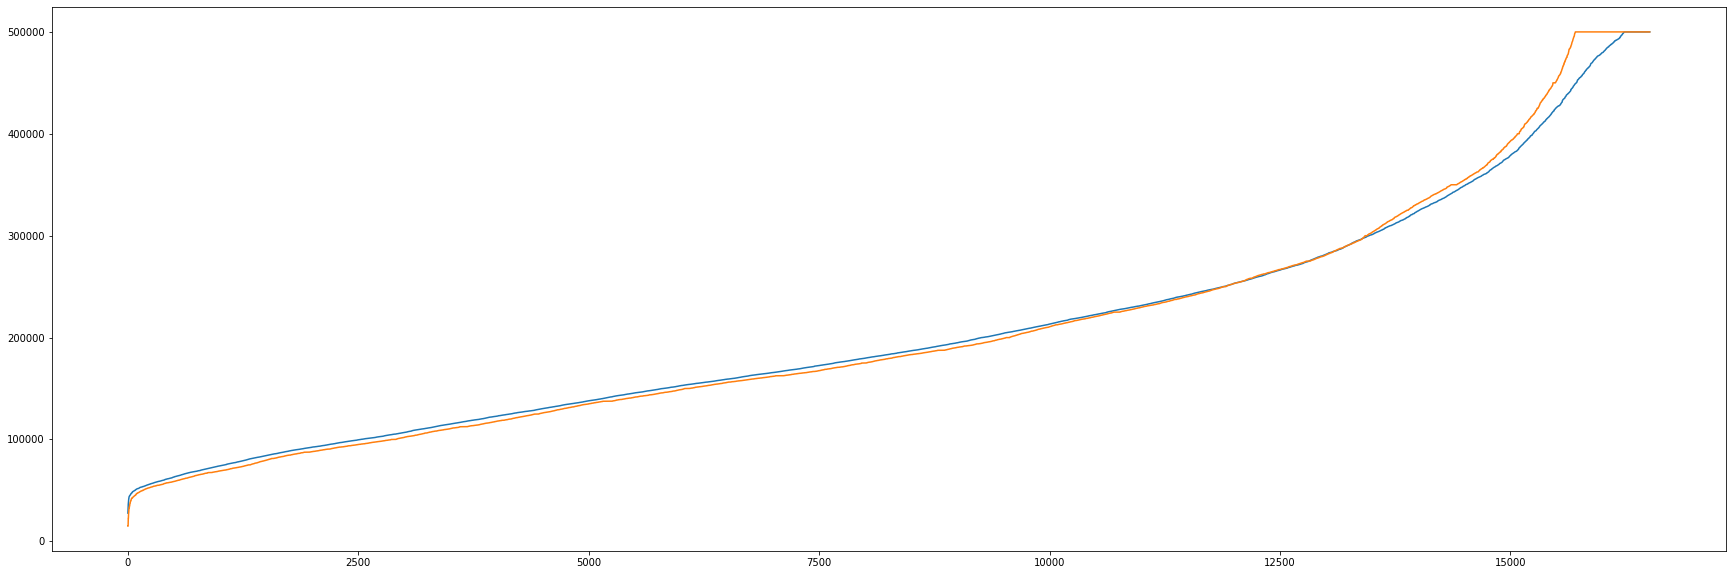

In [360]:
import matplotlib.pyplot as plt
import numpy

from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

t, e = forest_predictions.copy(), df_lbls.copy()
t = numpy.sort(t)
e = numpy.sort(e)

plt.figure()
plt.plot(t, label='RandomForestRegressor')
plt.plot(e, label="Labels")

Notice how the predictions fall near the labels themself...

In [264]:
forest_predictions

array([245220. , 320590. , 230810. , ...,  98790. , 212960. , 454590.5])

In [265]:
df_lbls.to_numpy()

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [266]:
df_feat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [267]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [319]:
final_model = grid_search.best_estimator_

x_test_pre = strat_test_set.drop("median_house_value", axis=1)
y_test_pre = strat_test_set['median_house_value'].copy()

x_test_prep_pre = full_pipeline.transform(x_test_pre)

final_prediction = final_model.predict(x_test_prep_pre)

final_mse = mean_squared_error(y_test_pre, final_prediction)
final_rmse = np.sqrt(final_mse)    


In [320]:
x_test_pre

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND
...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND


In [321]:
final_rmse  # got final rmse down. seems that the one hot encoding did it wrong

46398.49745830166

In [322]:
forest_rmse - final_rmse

-24182.676899475424

In [323]:
forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [324]:
scores = cross_val_score(final_model, x_test_prep_pre, y_test_pre, scoring='neg_mean_squared_error', cv=10)
final_rmse_scores = np.sqrt(-scores)

In [325]:
display_scores(final_rmse_scores)

Scores: [48318.74482672 55142.488091   55725.6586608  50670.99390149
 54017.56144844 48643.58034611 51671.10965166 48804.40215017
 54604.05294546 46387.89283699]
Mean: 51398.648485886704
Standard Deviation: 3152.6240563462197


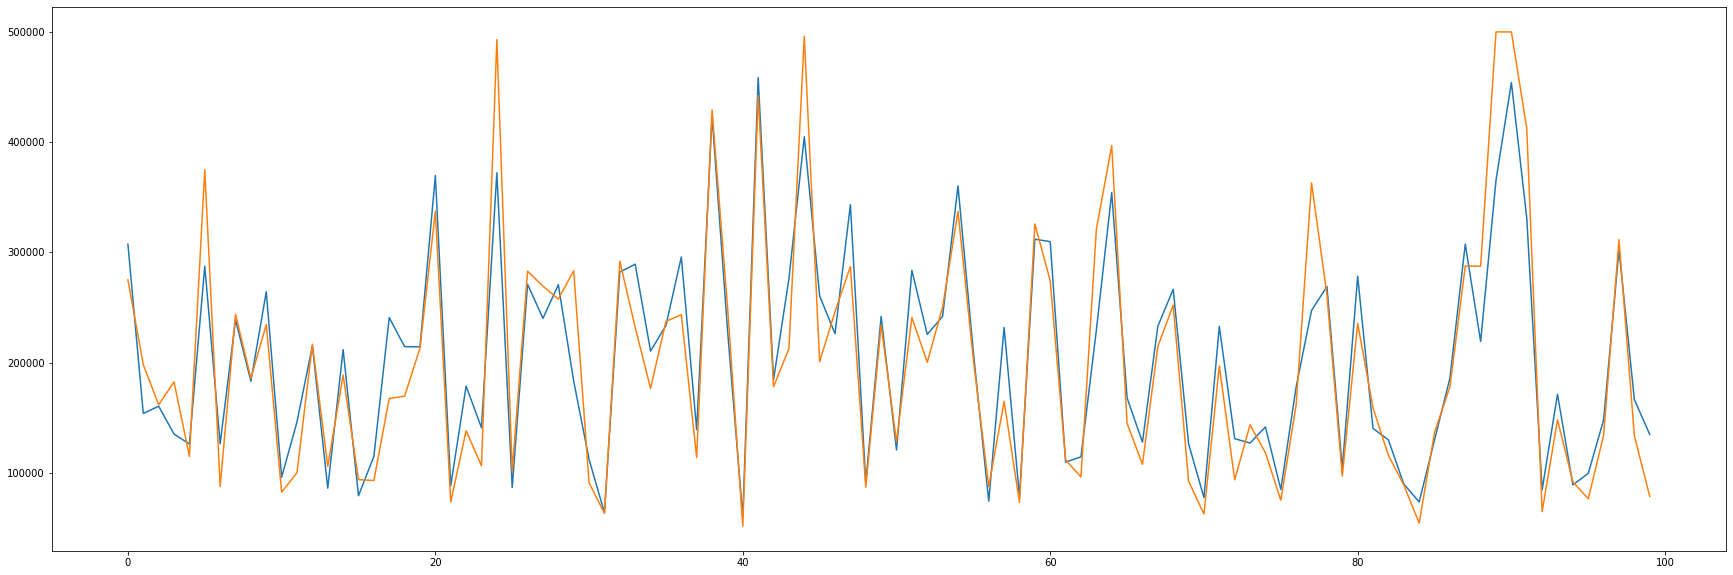

In [326]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

plt.figure()
plt.plot(final_prediction[-100:], label='RandomForestRegressor')
plt.plot(y_test_pre.to_numpy()[-100:], label="Labels")

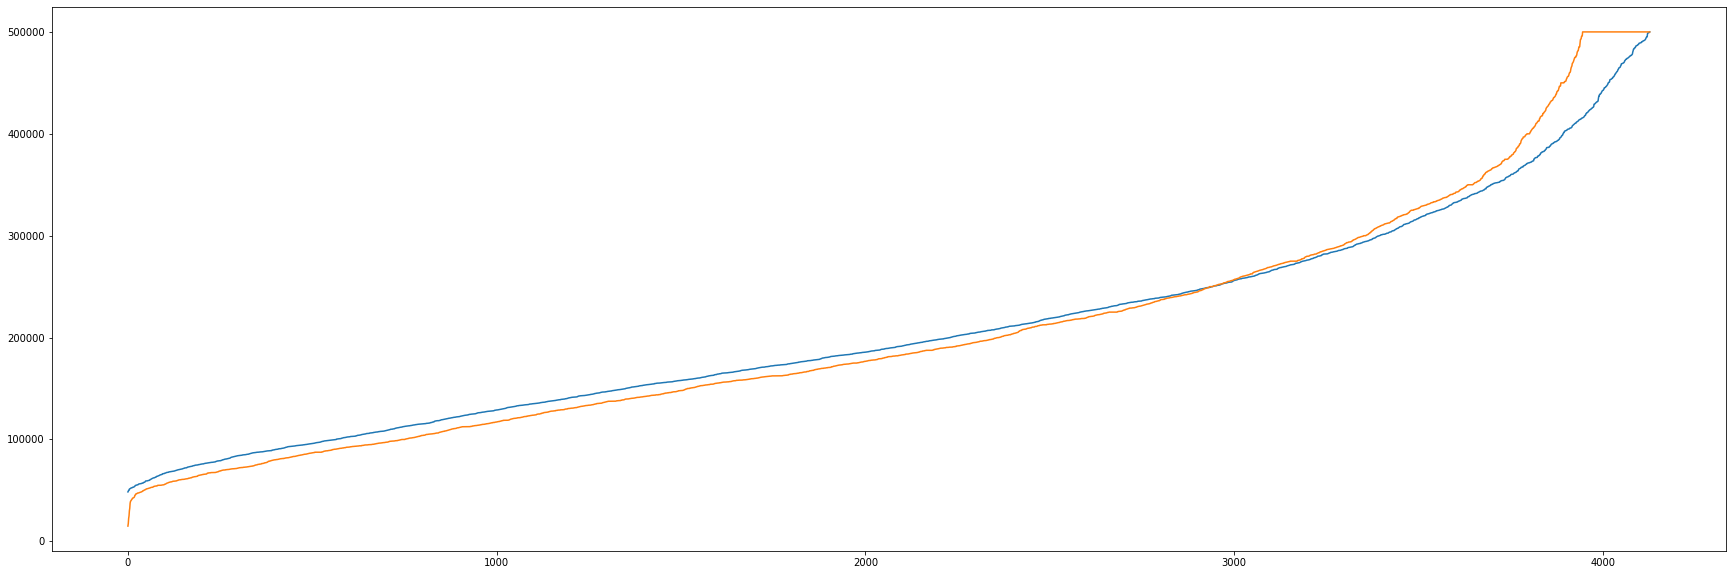

In [334]:
import matplotlib.pyplot as plt
import numpy

from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

f, y = final_prediction.copy(), y_test_pre.copy()
f = numpy.sort(f)
y = numpy.sort(y)

plt.figure()
plt.plot(f, label='RandomForestRegressor')
plt.plot(y, label="Labels")

In [347]:
training_model = grid_search.best_estimator_

training_prediction = training_model.predict(x_test_prep_pre)

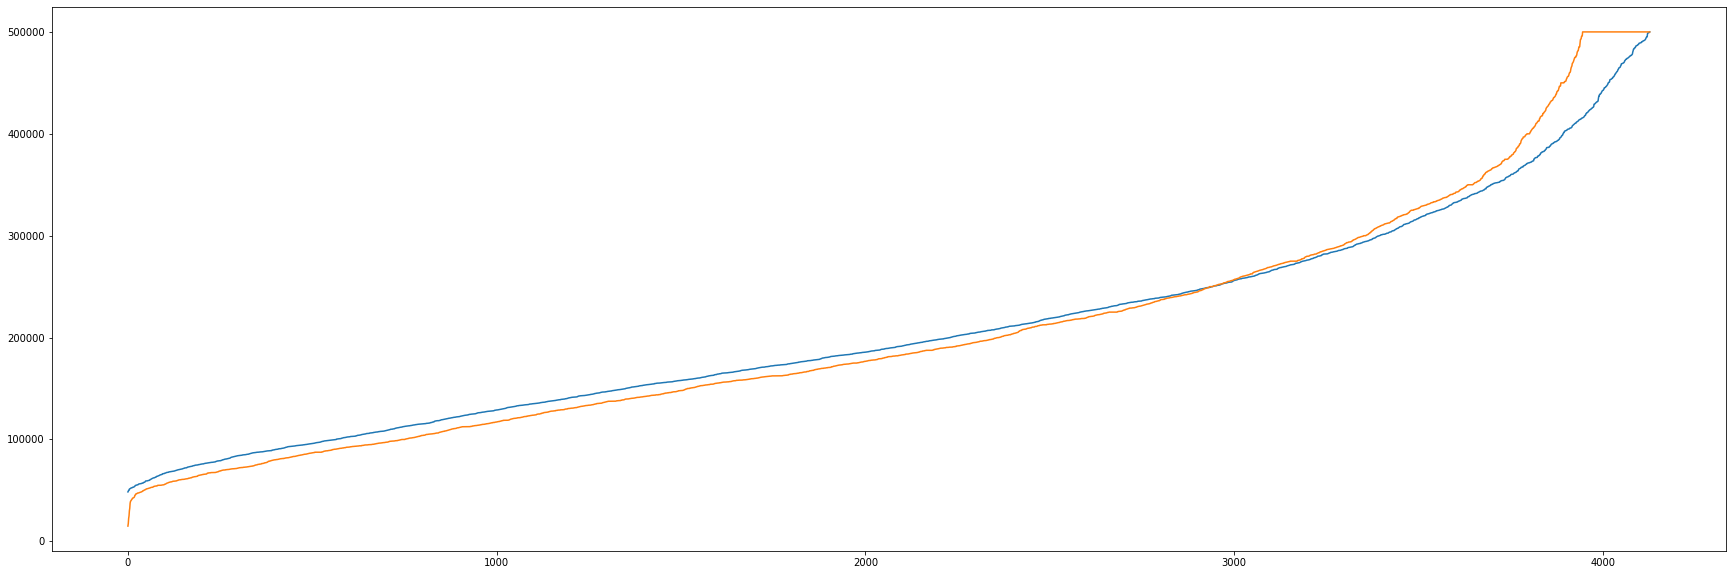

In [355]:
import matplotlib.pyplot as plt
import numpy

from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

f, y, p = training_prediction.copy(), y_test_pre.copy(), df_lbls.copy()
f = numpy.sort(f)
y = numpy.sort(y)
p = numpy.sort(p)

plt.figure()
plt.plot(f, label='RandomForestRegressor')
plt.plot(y, label="Labels")